In [39]:
import xarray

In [40]:
df = xarray.open_dataset(r"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Data\RF25_ind1951_rfp25.nc")
df

<xarray.Dataset>
Dimensions:    (LONGITUDE: 135, LATITUDE: 129, TIME: 365)
Coordinates:
  * LONGITUDE  (LONGITUDE) float64 66.5 66.75 67.0 67.25 ... 99.5 99.75 100.0
  * LATITUDE   (LATITUDE) float64 6.5 6.75 7.0 7.25 ... 37.75 38.0 38.25 38.5
  * TIME       (TIME) datetime64[ns] 1951-01-01 1951-01-02 ... 1951-12-31
Data variables:
    RAINFALL   (TIME, LATITUDE, LONGITUDE) float64 ...
Attributes:
    history:      FERRET V7.5 (optimized) 20-Jan-23
    Conventions:  CF-1.6

In [41]:
df.keys()

KeysView(<xarray.Dataset>
Dimensions:    (LONGITUDE: 135, LATITUDE: 129, TIME: 365)
Coordinates:
  * LONGITUDE  (LONGITUDE) float64 66.5 66.75 67.0 67.25 ... 99.5 99.75 100.0
  * LATITUDE   (LATITUDE) float64 6.5 6.75 7.0 7.25 ... 37.75 38.0 38.25 38.5
  * TIME       (TIME) datetime64[ns] 1951-01-01 1951-01-02 ... 1951-12-31
Data variables:
    RAINFALL   (TIME, LATITUDE, LONGITUDE) float64 ...
Attributes:
    history:      FERRET V7.5 (optimized) 20-Jan-23
    Conventions:  CF-1.6)

In [42]:
df['RAINFALL']

<xarray.DataArray 'RAINFALL' (TIME: 365, LATITUDE: 129, LONGITUDE: 135)>
[6356475 values with dtype=float64]
Coordinates:
  * LONGITUDE  (LONGITUDE) float64 66.5 66.75 67.0 67.25 ... 99.5 99.75 100.0
  * LATITUDE   (LATITUDE) float64 6.5 6.75 7.0 7.25 ... 37.75 38.0 38.25 38.5
  * TIME       (TIME) datetime64[ns] 1951-01-01 1951-01-02 ... 1951-12-31
Attributes:
    long_name:  Rainfall
    units:      mm
    history:    From ind1951_rfp25.grd

In [43]:
df['RAINFALL'][1]

<xarray.DataArray 'RAINFALL' (LATITUDE: 129, LONGITUDE: 135)>
[17415 values with dtype=float64]
Coordinates:
  * LONGITUDE  (LONGITUDE) float64 66.5 66.75 67.0 67.25 ... 99.5 99.75 100.0
  * LATITUDE   (LATITUDE) float64 6.5 6.75 7.0 7.25 ... 37.75 38.0 38.25 38.5
    TIME       datetime64[ns] 1951-01-02
Attributes:
    long_name:  Rainfall
    units:      mm
    history:    From ind1951_rfp25.grd

In [44]:
rainfall_data = df['RAINFALL']

# Extract the rainfall data for the entire year
# Here, we're using the ':' operator to select all values along the TIME dimension
rainfall_year = rainfall_data[:, :, :]

# Print the dimensions of the extracted yearly rainfall data
print("Yearly rainfall data dimensions:", rainfall_year.shape)

# If you want to calculate the total rainfall for the entire year, you can sum the data
total_rainfall_year = rainfall_year.sum()

print("Total rainfall for the year:", total_rainfall_year)

Yearly rainfall data dimensions: (365, 129, 135)
Total rainfall for the year: <xarray.DataArray 'RAINFALL' ()>
array(4908881.65887684)


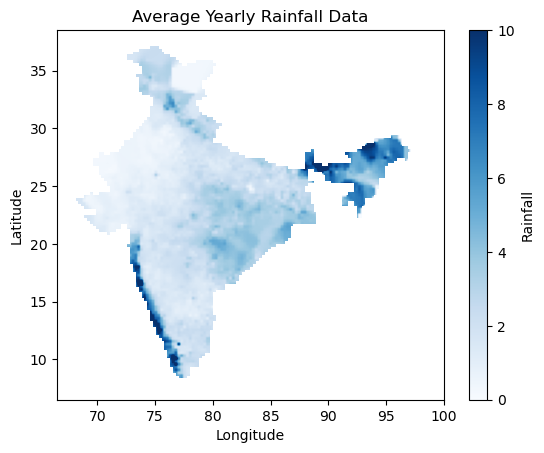

In [46]:
import xarray as xr
import matplotlib.pyplot as plt

# Load the dataset (assuming the dataset variable is named 'df')
# You should replace this with your actual dataset loading procedure
# df = ...

# Extract the rainfall data variable
rainfall_data = df['RAINFALL']

# Calculate the mean rainfall over the entire year
rainfall_yearly_mean = rainfall_data.mean(dim='TIME')

# Create a figure and axis for the plot
fig, ax = plt.subplots()

# Create a colormap
cmap = plt.get_cmap('Blues')  # You can choose any other colormap you prefer

# Determine the appropriate color limits based on your data
vmin = 0.0  # Minimum value for the color scale
vmax = 10.0  # Maximum value for the color scale

# Plot the average yearly rainfall data using the colormap
im = ax.imshow(rainfall_yearly_mean, cmap=cmap, vmin=vmin, vmax=vmax, origin='lower',
               extent=[df['LONGITUDE'].min(), df['LONGITUDE'].max(),
                       df['LATITUDE'].min(), df['LATITUDE'].max()])

# Add colorbar
cbar = plt.colorbar(im, ax=ax, label='Rainfall')

# Set axis labels
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Average Yearly Rainfall Data')

# Show the plot
plt.show()

In [47]:
rainfall_data[0]

<xarray.DataArray 'RAINFALL' (LATITUDE: 129, LONGITUDE: 135)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * LONGITUDE  (LONGITUDE) float64 66.5 66.75 67.0 67.25 ... 99.5 99.75 100.0
  * LATITUDE   (LATITUDE) float64 6.5 6.75 7.0 7.25 ... 37.75 38.0 38.25 38.5
    TIME       datetime64[ns] 1951-01-01
Attributes:
    long_name:  Rainfall
    units:      mm
    history:    From ind1951_rfp25.grd

In [56]:
np.set_printoptions(threshold=np.inf, linewidth=np.inf)
print(np.array(rainfall_yearly_mean))

[[        nan         nan         nan         nan         nan         nan         nan         nan         nan         nan         nan         nan         nan         nan         nan         nan         nan         nan         nan         nan         nan         nan         nan         nan         nan         nan         nan         nan         nan         nan         nan         nan         nan         nan         nan         nan         nan         nan         nan         nan         nan         nan         nan         nan         nan         nan         nan         nan         nan         nan         nan         nan         nan         nan         nan         nan         nan         nan         nan         nan         nan         nan         nan         nan         nan         nan         nan         nan         nan         nan         nan         nan         nan         nan         nan         nan         nan         nan         nan         nan         nan         nan         nan   